In [1]:
""" Import Libraries """

import numpy as np
import pandas as pd
import scipy as sp
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.colors import Normalize
import os

plt.style.use('ggplot')

os.getcwd()

'C:\\Users\\moche\\Documents\\working_programs\\old code'

In [2]:
" Utility Functions"

def namestr(obj, namespace):
    """
    Calls name of non string variable as a string
    
    Inputs: 'obj'       - Any non string object to be named
            'namespace' - Symbol table to be accessed
    
    Outputs: variable as string
    
    """
    
    return [name for name in namespace if namespace[name] is obj]

In [3]:
" Import data from .csv into a numpy array and perform PCA "

# Make data array 
df = pd.read_csv('Lip_space_time-17-Nov-2021.csv')
data = df.to_numpy()

# Remove NaN columns 
adj_data = np.delete(data,[7,12,13,14],1) # Removed PI45P2, Carmil, ArpB & PI4P columns 

print(df)

            x   t  curvature       PIP3   LifeAct       NAP    PI34P2  PI45P2  \
0    4.000000 -60   0.032085   1.259733  1.064708  1.113695  1.125664     NaN   
1    4.000000 -57   0.033874   1.252147  0.965258  1.060444  1.077171     NaN   
2    4.000000 -54   0.033550   1.404829  0.869329  1.020091  1.003469     NaN   
3    4.000000 -51   0.034951   1.334462  0.892470  1.038189  1.061488     NaN   
4    4.000000 -48   0.028391   1.124881  0.879124  1.046749  0.977287     NaN   
..        ...  ..        ...        ...       ...       ...       ...     ...   
815 -2.149249 -15  -0.210964  13.760881  6.620512  0.720635  2.163126     NaN   
816 -2.172579 -12  -0.188980  13.273090  6.449913  0.822756  1.962913     NaN   
817 -2.256668  -9  -0.204499  14.720457  6.725740  0.826510  1.762699     NaN   
818 -2.396042  -6  -0.287903  16.591508  6.945560  0.795949  1.562486     NaN   
819 -2.613560  -3  -0.390188  17.313876  6.589804  0.793550  1.362272     NaN   

         PTEN     Myo1B    

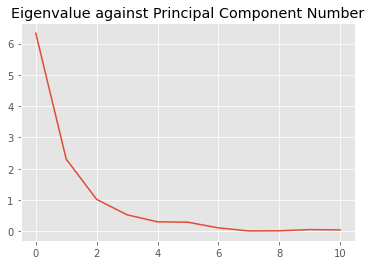

In [4]:
" PCA Cell "

def standardize_data(arr):
    
    '''
    This function standardizes an array by substracting each element by 
    the column mean value and then dividing the standard deviation.
    
    Inputs: arr(array) 
    Outputs: standardizedArray(array)
    '''    
    row, col = arr.shape
    
    standardizedArray = np.zeros(shape=(row, col))
    tempArray = np.zeros(row)
    
    for i in range(col):
        
        mean = np.mean(arr[:,i])
        std = np.std(arr[:,i])
        tempArray = np.empty(0)
        
        for element in arr[:,i]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,i] = tempArray
    
    return standardizedArray


cov_mat = np.cov(standardize_data(adj_data), rowvar=False)

eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
#print("Eigenvector: \n",eigen_vectors,"\n")
#print("Eigenvalues: \n", eigen_values, "\n")

#plt.style.use('ggplot')
plt.title("Eigenvalue against Principal Component Number")
#print(eigen_vectors)
plt.plot(eigen_values)

In [5]:
" Data Processing "

def dc_dt(c_arr, t_int, mov_len):
    
    """
    - Function to calculate the corresponding rate of change of flux w.r.t time.
    - Under assumption that input c_arr follows time scheme given in df of input data.
    - First 19 values are calculated with constant time interval 3s, 20th automatically
      set to zero. 
    
    Inputs: c_arr(array(1D))   - Input array of concentration values for series of cup closures 
            t_int(int)         - Time interval at which measurements were taken for concentration values
            mov_len(int)       - How many time intervals (t_int) per movie
   
    Outputs: dc_arr(array(1D)) - Output array of dc/dt values for all concentration points sans 20*nth values
    
    """
    
    num_of_elements = len(c_arr) 
    num_of_movies = num_of_elements/mov_len
    
    zero_ind_arr = np.subtract(np.multiply(np.arange(1,num_of_movies+1),mov_len),1)
    dc_arr = np.empty([num_of_elements,1])
    
    for value in range(num_of_elements-1):
        
        dc_arr[value]= (c_arr[value+1]-c_arr[value])/t_int
    
    for index in range(len(zero_ind_arr)):
        
        dc_arr[int(zero_ind_arr[index])] = 0
    
    return dc_arr

#print(dc_dt(adj_data[:,3],3,20))




Text(0, 0.5, 'PTEN')

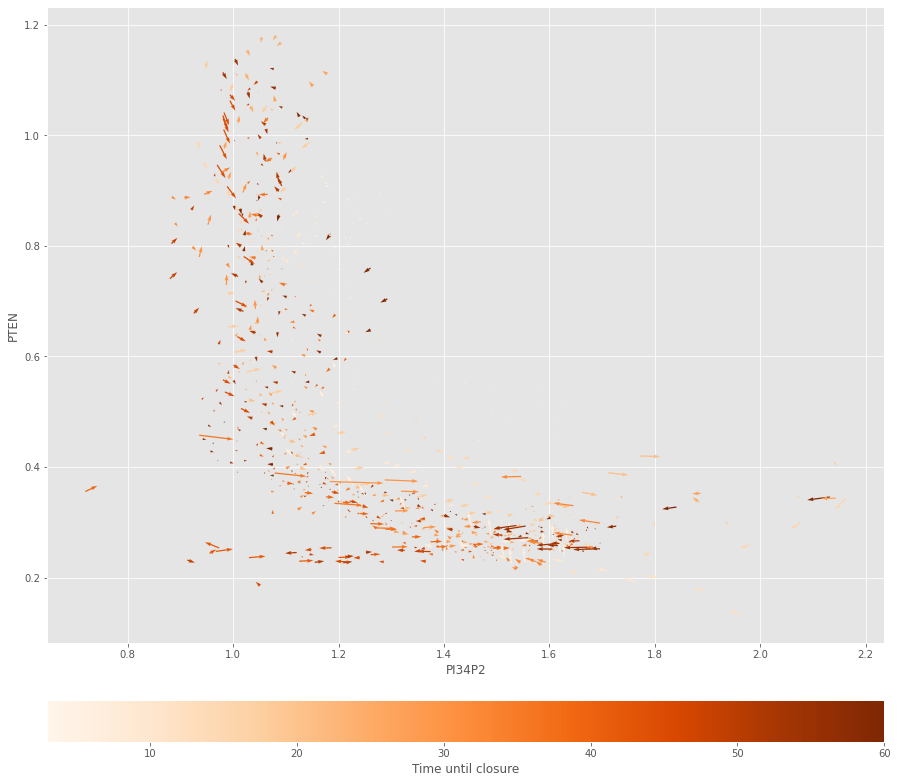

In [31]:
" Phase portrait graphics processing "

# Extract column values separately 
gDistance = adj_data[:,0]
time = adj_data[:,1]
Curvature = adj_data[:,2]
PIP3 = adj_data[:,3]
Actin= adj_data[:,4]
NAP = adj_data[:,5]
PI34P2 = adj_data[:,6]
PTEN = adj_data[:,7]
Myo1B = adj_data[:,8]
Myo1E = adj_data[:,9]
Coronin = adj_data[:,10]

# initialise 2 component system
a = PI34P2
h = PTEN
dadt = dc_dt(a,3,20)
dhdt = dc_dt(h,3,20)

str_a = namestr(a, globals())[0]
str_h = namestr(h, globals())[0]

# define colour map
colour = np.multiply(time,-1) # make positive to normalise as [0,1]
norm = Normalize() # Norm function
norm.autoscale(colour) # Scale 'colour' array elements between 0 and 1 
colourmap = cm.Oranges # RGB mapping to be used

# create a scalar mappable
sm = plt.cm.ScalarMappable(cmap=colourmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots()
ax.quiver(a, h, dadt,dhdt,scale=5,width=0.0015, color=colourmap(norm(colour)))
plt.colorbar(sm, label='Time until closure', orientation='horizontal', pad=0.07)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.xlabel(str_a)
plt.ylabel(str_h)
#plt.savefig(str_a+"_"+str_h,dpi=300)

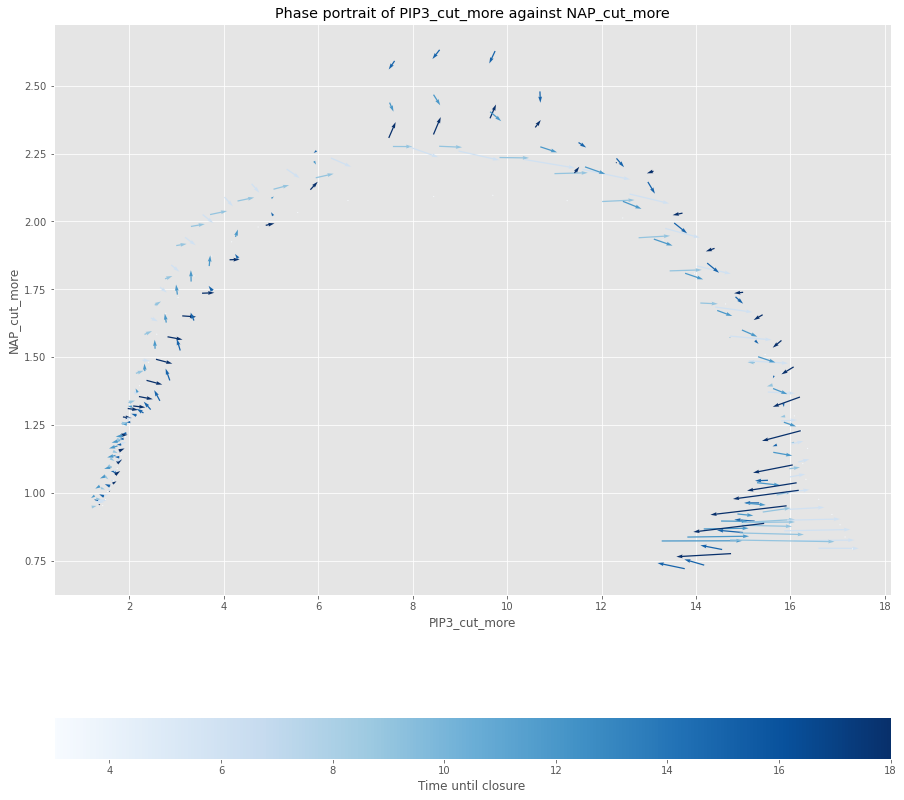

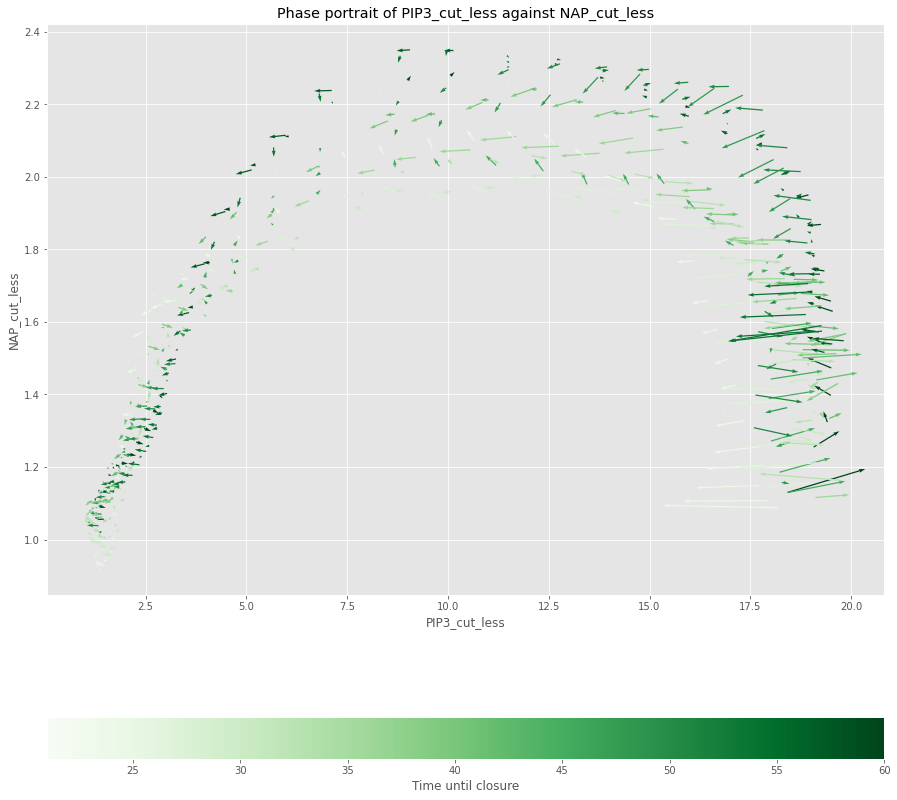

In [7]:
" Data processing for data split by time"

cutoff_time = -20 # choose cutoff time (note the negative)

df = pd.read_csv('Lip_space_time-17-Nov-2021.csv') # read pandas dataframe from original data

# dataframe above cutoff time
df_above = df.drop(df[df.t < cutoff_time].index) # remove rows in data frame where time < cutoff time
cut_data_above = df_above.to_numpy() # convert pd dataframe to numpy array
adj_cut_more_data = np.delete(cut_data_above,[7,12,13,14],1) # Remove PI45P2, Carmil, ArpB & PI4P columns (NaN)

# dataframe less than cutoff time
df_below = df.drop(df[df.t >= cutoff_time].index) # remove rows in data frame where time > cutoff time
cut_data_below = df_below.to_numpy() # convert pd dataframe to numpy array
adj_cut_less_data = np.delete(cut_data_below,[7,12,13,14],1) # Remove PI45P2, Carmil, ArpB & PI4P columns (NaN)

#    ----------------------------------
#  | new data columns amended for time |
#   ----------------------------------

# above cutoff time
gDistance_cut_more = adj_cut_more_data[:,0]
time_cut_more = adj_cut_more_data[:,1]
Curvature_cut_more = adj_cut_more_data[:,2]
PIP3_cut_more = adj_cut_more_data[:,3]
Actin_cut_more = adj_cut_more_data[:,4]
NAP_cut_more = adj_cut_more_data[:,5]
PI34P2_cut_more = adj_cut_more_data[:,6]
PTEN_cut_more = adj_cut_more_data[:,7]
Myo1B_cut_more = adj_cut_more_data[:,8]
Myo1E_cut_more = adj_cut_more_data[:,9]
Coronin_cut_more = adj_cut_more_data[:,10]

# below cutoff time
gDistance_cut_less = adj_cut_less_data[:,0]
time_cut_less = adj_cut_less_data[:,1]
Curvature_cut_less = adj_cut_less_data[:,2]
PIP3_cut_less = adj_cut_less_data[:,3]
Actin_cut_less = adj_cut_less_data[:,4]
NAP_cut_less = adj_cut_less_data[:,5]
PI34P2_cut_less = adj_cut_less_data[:,6]
PTEN_cut_less = adj_cut_less_data[:,7]
Myo1B_cut_less = adj_cut_less_data[:,8]
Myo1E_cut_less = adj_cut_less_data[:,9]
Coronin_cut_less = adj_cut_less_data[:,10]

#   --------------------------------------------------
# | initialise new 2 component system above threshold |
#   --------------------------------------------------

a_cut_more = PIP3_cut_more
h_cut_more = NAP_cut_more
dadt_cut_more = dc_dt(a_cut_more,3,6) # ////// mov_len is now different !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dhdt_cut_more = dc_dt(h_cut_more,3,6) # ////// mov_len is now different !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

str_a_cut_more = namestr(a_cut_more, globals())[0]
str_h_cut_more = namestr(h_cut_more, globals())[0]

# define colour map
colour_cut_more = np.multiply(time_cut_more,-1) # make positive to normalise as [0,1]
norm=Normalize()
norm.autoscale(colour_cut_more) # Scale 'colour' array elements between 0 and 1 
colourmap_cut_more = cm.Blues # RGB mapping to be used

# create a scalar mappable
sm_cut_more = plt.cm.ScalarMappable(cmap=colourmap_cut_more, norm=norm)
sm_cut_more.set_array([])

fig1, ax1 = plt.subplots()
ax1.quiver(a_cut_more, h_cut_more, dadt_cut_more, dhdt_cut_more, scale=5, width=0.0015, color=colourmap_cut_more(norm(colour_cut_more)))
plt.colorbar(sm_cut_more, label='Time until closure', orientation='horizontal')
fig1.set_figwidth(15)
fig1.set_figheight(15)
plt.title("Phase portrait of " + str_a_cut_more + " against " + str_h_cut_more)
plt.xlabel(str_a_cut_more)
plt.ylabel(str_h_cut_more)
plt.style.use('ggplot')
plt.savefig(str_a_cut_more+"_"+str_h_cut_more,dpi=300)

#   ---------------------------------------------------------
# | initialise 2 component counterpart system below threshold |
#   ---------------------------------------------------------


a_cut_less = PIP3_cut_less
h_cut_less = NAP_cut_less
dadt_cut_less = dc_dt(a_cut_less,3,14) # ////// mov_len is now different  !!!!!!
dhdt_cut_less = dc_dt(h_cut_less,3,14) # ////// mov_len is now different 1!!!!!!!!!!1

str_a_cut_less = namestr(a_cut_less, globals())[0]
str_h_cut_less = namestr(h_cut_less, globals())[0]

# define colour map
colour_cut_less = np.multiply(time_cut_less,-1) # make positive to normalise as [0,1]
norm=Normalize()
norm.autoscale(colour_cut_less) # Scale 'colour' array elements between 0 and 1 
colourmap_cut_less = cm.Greens # RGB mapping to be used

# create a scalar mappable
sm_cut_less = plt.cm.ScalarMappable(cmap=colourmap_cut_less, norm=norm)
sm_cut_less.set_array([])

fig1, ax1 = plt.subplots()
ax1.quiver(a_cut_less, h_cut_less, dadt_cut_less, dhdt_cut_less, scale=5, width=0.0015, color=colourmap_cut_less(norm(colour_cut_less)))
 
fig1.set_figwidth(15)
fig1.set_figheight(15)
plt.title("Phase portrait of " + str_a_cut_less + " against " + str_h_cut_less)
plt.xlabel(str_a_cut_less)
plt.ylabel(str_h_cut_less)
plt.style.use('ggplot')
plt.savefig(str_a_cut_less+"_"+str_h_cut_less,dpi=300)

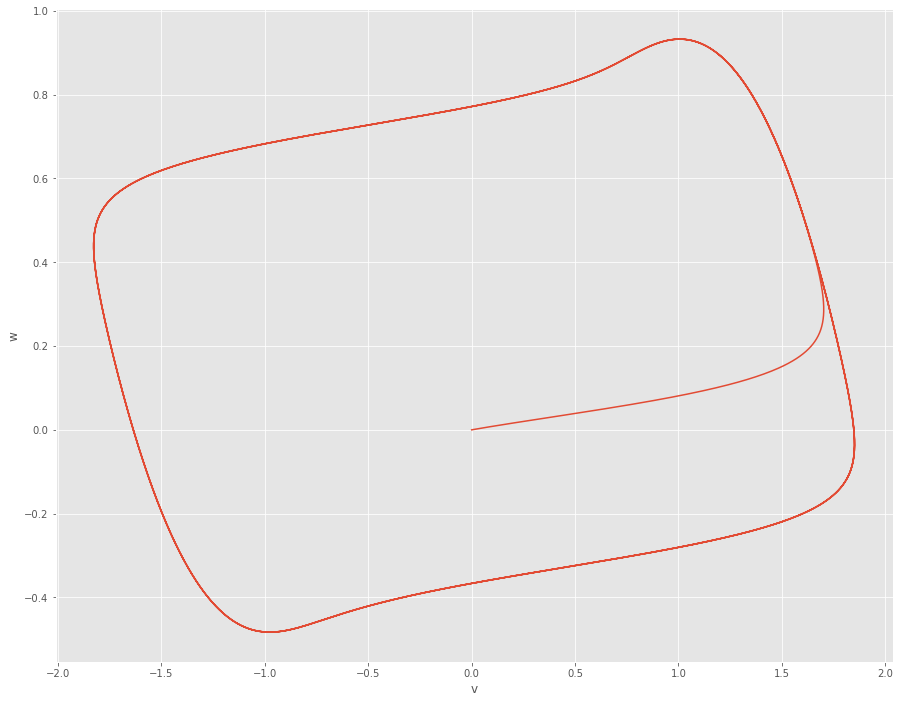

In [27]:
" Fitzhugh Nagumo Model "

# Set up initial conditions
p = (0.3,1.4,15,0.23) #a,b,tau,I
time_span = np.linspace(3, 60, num=1500)

scenarios = [
     {"a":-.3, "b":1.4, "tau":20, "I":0},
     {"a":-.3, "b":1.4, "tau":20, "I":0.23},
     {"a":-.3, "b":1.4, "tau":20, "I":0.5}
]
time_span = np.linspace(0, 200, num=15000)

# Define model to solve
def fhn_model(x, t, a, b, tau, I):
    """
    Inputs: 'x' (array) - [membrane potential, recovery variable]
            't' (float) - time
            'a' (float) - parameter 1
            'b' (float) - parameter 2
            'tau' (float) - timescale
            'I' (float) - Stimulus constant
    Outputs: dx/dt (array) - time derivative of x[0] and x[1]
    """
    dx0dt = x[0] - (x[0]**3/3) - x[1] + I # dv/dt
    dx1dt = (x[0] + a - b*x[1])/tau # dw/dt
    
    return np.array([dx0dt, dx1dt])

# Solve that model 

result_int = scipy.integrate.odeint(fhn_model, t=time_span,y0=[0,0], args= p)
plt.xlabel("v")
plt.ylabel("w")
fig = matplotlib.pyplot.gcf()
fig.set_figwidth(15)
fig.set_figheight(12)
plt.plot(result_int[:,0], result_int[:,1])


# Solve for nullclines where dx/dt = 0

def plot_nullcline(ax, a, b, tau, I, color='k', style='--', opacity=.5, vmin=-2,vmax=2):
    """
    Plot the null iscolines of the Fitzhugh nagumo system. 
    When we have the FHN dx/dt = 0, we can rearrange for x[1],
    thus we get x[1] for when dv/dt or dw/dt=0 and we can plot these equations.
    
    """
    
    v = np.linspace(vmin,vmax,100) # range of v values over which to solve 
    ax.plot(v, v - v**3 + I, style, color=color, alpha=opacity) # solve dv/dt = x[1](w)
    ax.plot(v, (v - a)/b, style, color=color, alpha=opacity) # solve dw/dt = x[1](w)

#fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#plot_nullcline(ax,0.3,1.4,15,0.23)
#plt.xlabel("v")
#plt.ylabel("w")

Number 0: 0
Number -3: 0
Number -6: 19
Number -9: 21
Number -12: 23
Number -15: 31
Number -18: 24
Number -21: 27
Number -24: 24
Number -27: 17
Number -30: 32
Number -33: 25
Number -36: 22
Number -39: 20
Number -42: 33
Number -45: 29
Number -48: 27
Number -51: 27
Number -54: 34
Number -57: 32


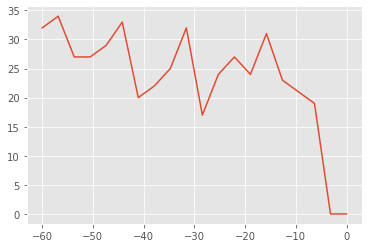

In [9]:
" Identifying Regimes by time divide "

#  ------------------------------------------------------------------------------
# / Identify the 'division cluster' of data points for calculating time regime /
# ----------------------------------------------------------------------------

X = PIP3
Y = NAP

dXdt = dc_dt(X,3,20)
dYdt = dc_dt(Y,3,20)

m_vec = np.sqrt(np.power(dXdt,2) + np.power(dYdt,2))
Z = m_vec

test = np.column_stack((time, Z))
test = np.delete(test, np.where(test[:,1]==0),axis=0)
test1 = np.delete(test, np.where(test[:,1]>0.08),axis=0)
test2 = np.delete(test1, np.where(test1[:,1]<-0.08),axis=0)

store = np.empty(20)
for i in range(20):
    it = i*-3
    arr = np.count_nonzero(test2==it)
    print ("Number " + str(it) + ": " + str(arr))
    store[i]=arr
    
plt.plot(np.linspace(0,-60,20), store)


(820, 1)
(820,)


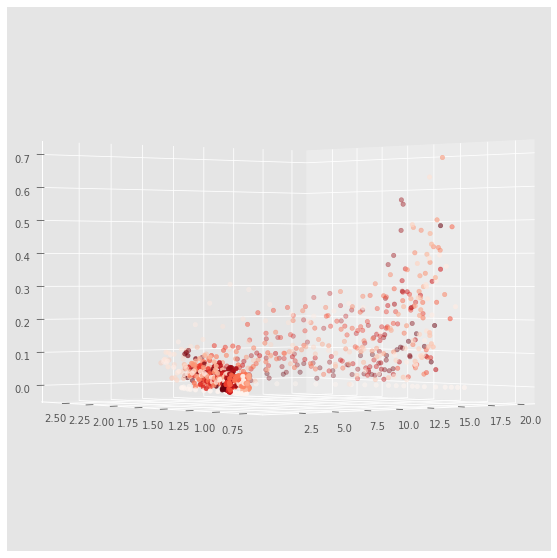

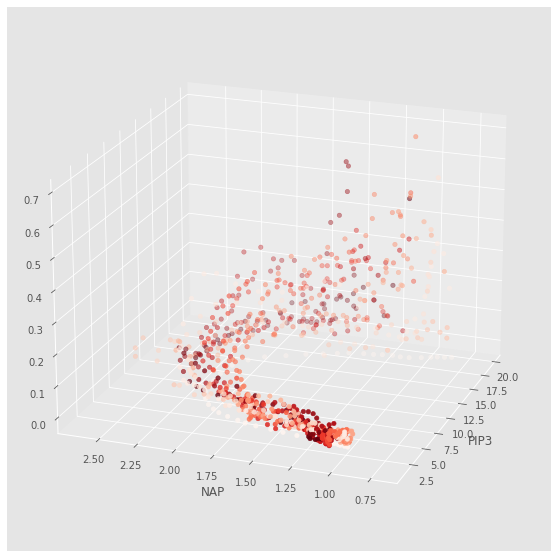

In [10]:
" Identifying Regimes by time divide "

X = PIP3
Y = NAP

dXdt = dc_dt(X,3,20)
dYdt = dc_dt(Y,3,20)

m_vec = np.sqrt(np.power(dXdt,2) + np.power(dYdt,2))
Z = m_vec.flatten() 
print(np.shape(m_vec))
print(np.shape(time))

fig1, ax1 = plt.subplots(figsize=(10,10), subplot_kw={"projection": "3d"})
fig2, ax2 = plt.subplots(figsize=(10,10), subplot_kw={"projection": "3d"})


# define colour map
colour = np.multiply(time,-1) # make positive to normalise as [0,1]
norm = Normalize() # Norm func
norm.autoscale(colour) # Scale 'colour' array elements between 0 and 1 
colourmap = cm.Reds # RGB mapping to be used

# print("------X----------")
# print(dXdt)
# print("------Y----------")
# print(dYdt)
# print("------m----------")
# print(m_vec)

ax1.scatter3D(X,Y,Z, color=colourmap(norm(colour)))
ax2.scatter3D(X,Y,Z, color=colourmap(norm(colour)))

# ax1.set_zlim([0,0.15])
# ax1.set_xlim([0,12.5])
# ax1.set_ylim([0,1.6])

# ax2.set_zlim([0,0.15])
# ax2.set_xlim([0,10])
# ax2.set_ylim([0.6,1.6])

plt.xlabel("PIP3")
plt.ylabel("NAP")
ax1.view_init(0, 230)
ax2.view_init(20,200)
plt.show()
